In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
dataset=pd.read_table("C:/Users/Riddhi Shah/Desktop/project_github/smsspamcollection/SMSSpamCollection", names=['label','sms_msg'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [43]:
dataset.head()

,label,sms_msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
dataset['label']=dataset.label.map({'ham':0, 'spam':1})

In [45]:
dataset.describe

<bound method NDFrame.describe of       label                                            sms_msg
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
5         1  FreeMsg Hey there darling it's been 3 week's n...
6         0  Even my brother is not like to speak with me. ...
7         0  As per your request 'Melle Melle (Oru Minnamin...
8         1  WINNER!! As a valued network customer you have...
9         1  Had your mobile 11 months or more? U R entitle...
10        0  I'm gonna be home soon and i don't want to tal...
11        1  SIX chances to win CASH! From 100 to 20,000 po...
12        1  URGENT! You have won a 1 week FREE membership ...
13        0  I've been searching for the right words to tha...
14        0          

Text(0, 0.5, 'count')

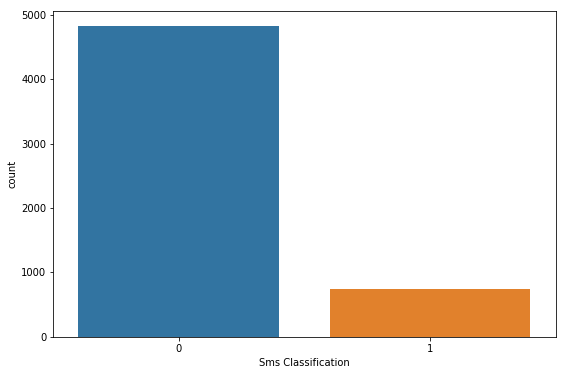

In [46]:
plt.figure(figsize=(9,6)) 
sns.countplot(x='label', data=dataset)
plt.xlabel('Sms Classification')
plt.ylabel('count')

In [47]:
dataset.shape

(5572, 2)

In [48]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Riddhi
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
docs=[]
ps=PorterStemmer()

In [50]:
for i in range(0,dataset.shape[0]):
    sms_msg = re.sub(pattern='[^a-zA-Z]', repl=' ', string=dataset.sms_msg[i])
    sms_msg=sms_msg.lower()
    words=sms_msg.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words=[ps.stem(word) for word in words]
    sms_msg=' '.join(words)
    docs.append(sms_msg)

In [51]:
docs[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [40]:
#bag of words can also be done using this method too along with the porter stemmer 
'''docs=['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']
lower_case_doc=[] #converts all letters into lower case 
for i in docs:
    lower_case_doc.append(i.lower())
print(lower_case_doc)'''

"docs=['Hello, how are you!',\n             'Win money, win from home.',\n             'Call me now.',\n             'Hello, Call hello you tomorrow?']\nlower_case_doc=[] #converts all letters into lower case \nfor i in docs:\n    lower_case_doc.append(i.lower())\nprint(lower_case_doc)"

In [13]:
'''punct_documents = []
import string
# removing all punctuations 
for i in lower_case_doc:
    punct_documents.append(i.translate(str.maketrans('', '', string.punctuation)))
print(punct_documents)'''

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


In [14]:
'''# splitting up words in the sentence 
pre_doc =[]
for i in punct_documents:
    pre_doc.append(i.split())
print(pre_doc)'''

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


In [15]:
'''freq_list=[]
#counting the frequency of words 
import pprint
from collections import Counter
for i in pre_doc:
    freq_count=Counter(i)#checks each word in a sentence
    freq_list.append(freq_count)
pprint.pprint(freq_list)'''

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [16]:
'''documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

In [38]:
'''from sklearn.feature_extraction.text import CountVectorizer 
count_vector=CountVectorizer()#use for counting the freq of words in the sentence

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [18]:
#print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [19]:
'''count_vector.fit(documents)#fitting the model for extracting features 
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [20]:
'''array=count_vector.transform(documents).toarray()
array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [21]:
'''freq_matrix=pd.DataFrame(array,columns=count_vector.get_feature_names())
# for counting frequency of words in the sample document
freq_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [52]:
#train and test split 
from sklearn.model_selection import train_test_split

In [53]:
count_vector=CountVectorizer()

In [54]:
X=count_vector.fit_transform(docs).toarray()
y = pd.get_dummies(dataset['label'])
y = y.iloc[:, 1].values

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("Total no of set:{}".format(dataset.shape[0]))
print("Total no of rows in training set: {}".format(X_train.shape[0]))
print("Total no of rows in test set: {}".format(X_test.shape[0]))

Total no of set:5572
Total no of rows in training set: 4457
Total no of rows in test set: 1115


In [56]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
predictions=naive_bayes.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions, y_test)))
print('Precision score: ', format(precision_score(predictions, y_test)))
print('Recall score: ', format(recall_score(predictions, y_test)))

Accuracy score:  0.979372197309417
Precision score:  0.95
Recall score:  0.9101796407185628


In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[940,  15],
       [  8, 152]], dtype=int64)

Text(60.0, 0.5, 'Actual value')

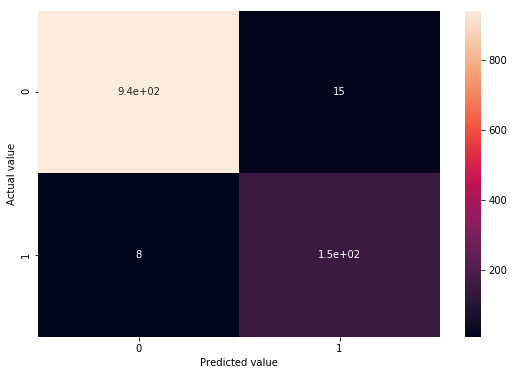

In [61]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [62]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score for alpha=0.0 is: 97.76%
Accuracy score for alpha=0.1 is: 97.67%
Accuracy score for alpha=0.2 is: 97.76%
Accuracy score for alpha=0.3 is: 97.85%
Accuracy score for alpha=0.4 is: 97.85%
Accuracy score for alpha=0.5 is: 97.67%
Accuracy score for alpha=0.6 is: 97.58%
Accuracy score for alpha=0.7 is: 97.67%
Accuracy score for alpha=0.8 is: 97.85%
Accuracy score for alpha=0.9 is: 98.03%
Accuracy score for alpha=1.0 is: 97.94%
--------------------------------------------
The best accuracy is 98.03% with alpha value as 0.9


In [63]:
naive_bayes=MultinomialNB(alpha=0.9)
naive_bayes.fit(X_train,y_train)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [64]:
def predict_ham_or_spam(sample):
    sample=re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample)
    sample=sample.lower()
    words=sample.split()
    words=[word for word in words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final=[ps.stem(word) for word in words]
    final=' '.join(final)
    temp=count_vector.transform([final]).toarray()
    return naive_bayes.predict(temp)

In [65]:
sample = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_ham_or_spam(sample):
  print('Spam message!')
else:
  print('Normal message.')

Spam message!


In [68]:
sample='Came to think of it. I have never got a spam message before.'
if predict_ham_or_spam(sample):
    print("Spam message")
else:
    print("Not a spam message")

Not a spam message
